In [25]:
import pickle
import numpy as np
from sklearn import ensemble
import pandas as pd
import datetime
import os



In [26]:
os.chdir(r'C:\Users\Enrique\Desktop\Proyecto\Datasets')
fh = open('Dataframe pickle.pkl','rb')
df = pickle.load(fh)
df = pd.DataFrame(df)
fh.close()

In [28]:
df.index = df["Unnamed: 0.1"].map(lambda x : datetime.datetime.strptime(x,"%Y-%m-%d"))
df.drop("Unnamed: 0", axis =1, inplace = True)
df.drop("Unnamed: 0.1", axis =1, inplace = True)
df.index.name = "Datetime"

In [24]:
df.columns[328]

'Range3'

In [ ]:
df1 = df.copy()



df1 = df1.drop(df1.columns[list(range(len(list(df.columns)[0:327])))], axis =1)

df1 = df1['2014':]
df = df['2014':]

X_train = df1[:'2021-05-01'].drop(['Change percentage','Range', "Range 3"], axis = 1)
y_train = df['Change percentage'][:'2021-05-01']



In [20]:
os.chdir(r'C:\Users\Enrique\Desktop\Proyecto\Modelos')
fh = open('Modelo RandomFOrestRegressor entrenado','rb')
model = pickle.load(fh) #modelo entrenado en collab

C:\Users\Enrique\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Enrique\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [21]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
importancia = pd.DataFrame(model.feature_importances_)
importancia.index = X_train.columns
importancia.columns = ["Variables"]
importancia.head(5)

In [22]:
importancia.sort_values("Variables", ascending = False) #importancia de las variables en el modelo

,Variables
Change percentage_1,0.015722
exch.bitfinex.flow.net.ntv_3,0.006290
exch.kraken.flow.net.ntv_6,0.006267
utxo.age.avg_8,0.006256
sply.rvv.1y_8,0.006226
...,...
Chaikin A/D Oscillator_2,0.000000
Chaikin A/D Line_8,0.000000
Hyperbolic Tangent_2,0.000000
sply.addr.bal.1m.ntv_2,0.000000


In [23]:
X_test = df1['2021-05-02':].drop(['Change percentage','Range'], axis = 1)
y_test = df1['Change percentage']['2021-05-02':]

In [24]:
yhat = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

r2_score(y_test, yhat)

-0.26886618598803214

In [26]:
mean_squared_error(y_test, yhat) #erro medio

19.118292807300918

In [28]:
df2 = df['2021-05-02':]
df2["yhat"] = yhat


C:\Users\Enrique\AppData\Local\Temp/ipykernel_81604/2317890516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["yhat"] = yhat


In [55]:
df2["Error"] = abs(df['Change percentage'] - df2["yhat"])

C:\Users\Enrique\AppData\Local\Temp/ipykernel_81604/2482677115.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



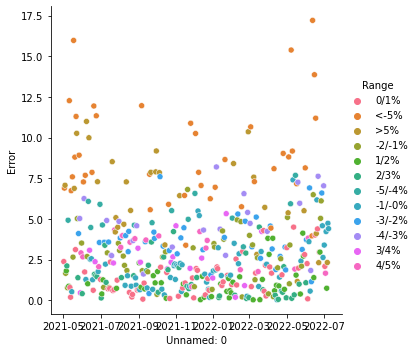

In [56]:
import seaborn as sns
palette = sns.color_palette("rocket_r")
sns.relplot(
    data=df2,
    x=df2.index, y="Error",
    hue="Range"
)

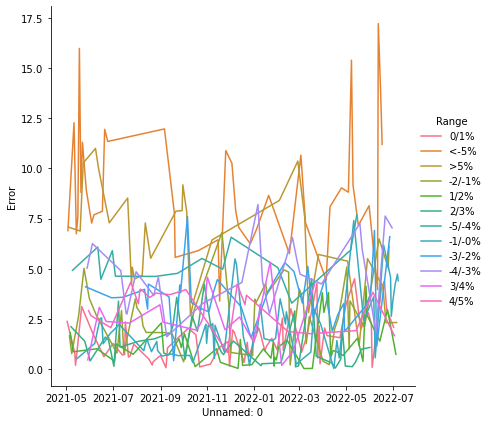

In [57]:
sns.relplot(x=df2.index, y="Error",hue="Range" ,kind="line", data=df2, height = 6)

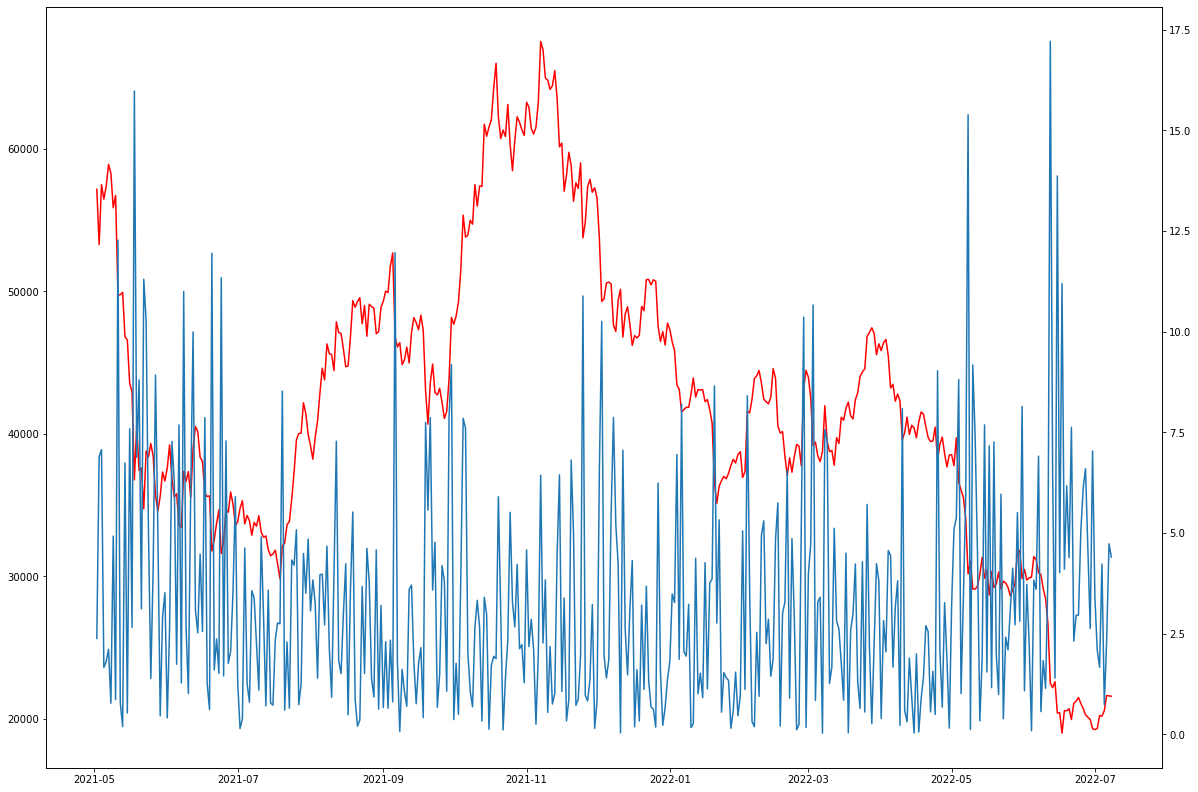

In [88]:
import matplotlib.pyplot as plt

fig, ax_left = plt.subplots( figsize=(20, 14))
ax_right = ax_left.twinx()

ax_left.plot(df2['Close'], color = 'red')
ax_right.plot(df2["Error"])


plt.show()

<AxesSubplot:xlabel='Range'>

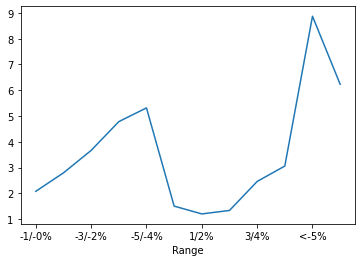

In [97]:
df2.groupby("Range")["Error"].mean().plot()